# Data Cleaning in Python

In [5]:
# import libraries and packages

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset 

data = pd.read_csv("C:/Users/nisha/Desktop/Data Science/avocado.csv", encoding = 'latin-1')

In [4]:
# Understand structure of data by looking at first few rows

data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# How many rows and columns are there?

data.shape

(18249, 14)

Dataset has total 18249 rows and 14 columns.

### Columns in Dataset

unnamed0: just the index

Date: Date

AveragePrice: the average price of a single avocado

Total Volume: Total number of avocados sold

4046: Total number of avocados with PLU 4046(small/medium hass avocado) sold

4225: Total number of avocados with PLU 4225(Large hass avocado) sold

4770: Total number of avocados with PLU 4770(extra large hass avocado) sold

Total Bags: Total number of bags of avocados sold 

Small Bags: Total number of small bags of avocados sold

Large Bags: Total number of Large bags of avocados sold 

type: conventional or organic

XLarge Bags: Total number of XLarge bags of avocados sold

In [ ]:
year: year

region: the city or region of the observation

In [7]:
# check missing values and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
There are no missing values 

Date, type and region are object. Unnamed and year are int64. Rest of the columns are float64. 

In [7]:
# change column names
# changing names of PLU no. to actual size of avocado

data = data.rename(columns={'4046' : 'small/medium', '4225' : 'large', '4770' : 'extra large'})

In [8]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'small/medium',
       'large', 'extra large', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

Column names are not uniform meaning some starts with lower case and some with upper cases. For uniformity changing all column names to lower cases

In [9]:
# column names to lower case

data.columns = data.columns.str.lower()
data.columns

Index(['unnamed: 0', 'date', 'averageprice', 'total volume', 'small/medium',
       'large', 'extra large', 'total bags', 'small bags', 'large bags',
       'xlarge bags', 'type', 'year', 'region'],
      dtype='object')

In [10]:
# correcting column name averageprice to average price

data = data.rename(columns={'averageprice' : 'average price'})
data.columns

Index(['unnamed: 0', 'date', 'average price', 'total volume', 'small/medium',
       'large', 'extra large', 'total bags', 'small bags', 'large bags',
       'xlarge bags', 'type', 'year', 'region'],
      dtype='object')

In [11]:
# drop column 

data = data.drop(columns=['unnamed: 0'])
data.head()

,date,average price,total volume,small/medium,large,extra large,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
# Checking for duplicates

data.shape

(18249, 13)

In [13]:
data.drop_duplicates().shape

(18249, 13)

since shape of data after dropping duplicates is same as shape of original data, there are no duplicates.

In [14]:
# Checking outliers

data.describe()

,average price,total volume,small/medium,large,extra large,total bags,small bags,large bags,xlarge bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


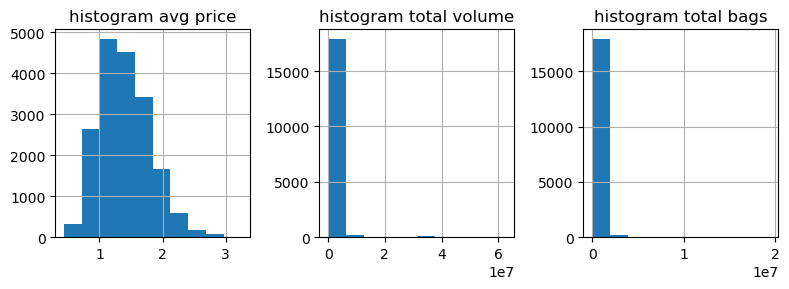

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

data['average price'].hist(ax=axes[0])
axes[0].set_title('histogram avg price')

data['total volume'].hist(ax = axes[1])
axes[1].set_title('histogram total volume')

data['total bags'].hist(ax = axes[2])
axes[2].set_title('histogram total bags')

plt.tight_layout()
plt.show()



average price histogram is slightly right skewed meaning there are some outliers, and total volume and total bags histograms are 
completely right skewed meaning there are many outliers.

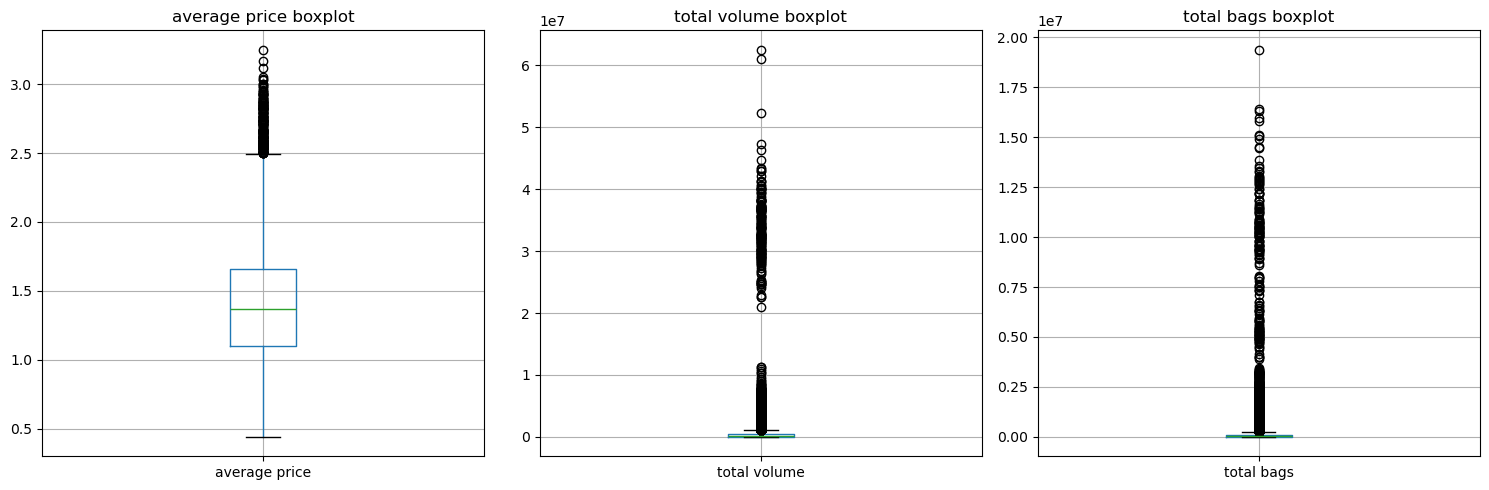

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a boxplot for each column
data[['average price']].boxplot(ax=axes[0])
axes[0].set_title('average price boxplot')

data[['total volume']].boxplot(ax=axes[1])
axes[1].set_title('total volume boxplot')

data[['total bags']].boxplot(ax=axes[2])
axes[2].set_title('total bags boxplot')

plt.tight_layout()
plt.show()

Almost all outliers are grester than maximum value for all average price, volume and no of bags.

#### average price outliers

In [17]:
# upper and lower limit

upper_limit = data['average price'].mean() + 3 * data['average price'].std()
lower_limit = data['average price'].mean() - 3 * data['average price'].std()

print('upper limit :' + str(upper_limit))
print('lower limit :' + str(lower_limit))

upper limit :2.614008076262528
lower limit :0.19794874328922796


In [18]:
# find outliers

outlier_price = data.loc[(data['average price'] > upper_limit) | (data['average price'] < lower_limit)]
outlier_price



,date,average price,total volume,small/medium,large,extra large,total bags,small bags,large bags,xlarge bags,type,year,region
11320,2015-10-18,2.79,12642.11,961.55,11680.56,0.00,0.00,0.00,0.00,0.0,organic,2015,SanFrancisco
11321,2015-10-11,2.66,14031.73,1046.84,12984.89,0.00,0.00,0.00,0.00,0.0,organic,2015,SanFrancisco
11323,2015-09-27,2.74,11798.62,1220.59,10523.68,0.00,54.35,54.35,0.00,0.0,organic,2015,SanFrancisco
11324,2015-09-20,2.79,15197.42,1209.92,13971.53,0.00,15.97,15.97,0.00,0.0,organic,2015,SanFrancisco
11325,2015-09-13,2.73,14802.78,1404.23,13395.36,0.00,3.19,3.19,0.00,0.0,organic,2015,SanFrancisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,2017-09-03,2.81,4111.66,22.60,2396.41,19.81,1672.84,71.11,1601.73,0.0,organic,2017,StLouis
17303,2017-08-27,2.84,3591.12,44.10,2900.22,10.77,636.03,190.01,446.02,0.0,organic,2017,StLouis
17304,2017-08-20,2.64,4715.07,149.97,2885.47,18.05,1661.58,697.14,964.44,0.0,organic,2017,StLouis
17402,2017-10-15,2.70,3288.85,125.79,659.65,0.00,2503.41,1736.66,766.75,0.0,organic,2017,Tampa


In [19]:
outlier_price['type'].value_counts()

type
organic    131
Name: count, dtype: int64

In [20]:
outlier_price['region'].value_counts()

region
SanFrancisco           37
Seattle                12
RaleighGreensboro      10
Spokane                10
Boise                   9
Portland                8
HartfordSpringfield     7
Charlotte               6
LasVegas                5
StLouis                 5
MiamiFtLauderdale       3
Orlando                 3
WestTexNewMexico        3
Tampa                   2
GrandRapids             2
SanDiego                2
Sacramento              2
PhoenixTucson           2
Jacksonville            1
NewYork                 1
Atlanta                 1
Name: count, dtype: int64

All outliers in average price i.e all higher prices belong to organic avocados. 

In [21]:
# data size of outlier_price

(outlier_price.size/data.size)*100

0.7178475532905912

#### volume outliers

In [22]:
# upper and lower limit

upper_limit = data['total volume'].mean() + 3 * data['total volume'].std()
lower_limit = data['total volume'].mean() - 3 * data['total volume'].std()

print('upper limit :' + str(upper_limit))
print('lower limit :' + str(lower_limit))

upper limit :11211280.079207376
lower limit :-9509992.053189512


In [23]:
# find outliers

outlier_volume = data.loc[(data['total volume'] > upper_limit) | (data['total volume'] < lower_limit)]
outlier_volume

,date,average price,total volume,small/medium,large,extra large,total bags,small bags,large bags,xlarge bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
9098,2018-01-28,1.09,40171640.84,14551799.50,12119884.61,575974.74,12923981.99,9749412.19,3041125.42,133444.38,conventional,2018,TotalUS
9099,2018-01-21,1.08,42939821.55,14218843.83,13929702.12,928815.12,13862460.48,9866218.28,3789722.90,206519.30,conventional,2018,TotalUS
9100,2018-01-14,1.20,37299945.22,12600918.24,11866197.84,652808.40,12180020.74,8128241.88,3917569.95,134208.91,conventional,2018,TotalUS


In [24]:
outlier_volume['region'].value_counts()

region
TotalUS       169
California      1
West            1
Name: count, dtype: int64

In [25]:
outlier_volume['type'].value_counts()

type
conventional    171
Name: count, dtype: int64

Almost all outliers or higher volumes belong to region Total US and are conventional avocados.

In [26]:
#size of outlier_volume

(outlier_volume.size/data.size)*100

0.9370376458984053

#### total bags outliers

In [27]:
# upper and lower limit

upper_limit = data['total bags'].mean() + 3 * data['total bags'].std()
lower_limit = data['total bags'].mean() - 3 * data['total bags'].std()

print('upper limit :' + str(upper_limit))
print('lower limit :' + str(lower_limit))

upper limit :3198366.3997090776
lower limit :-2719087.9955893997


In [28]:
# find outliers

outlier_bags = data.loc[(data['total bags'] > upper_limit) | (data['total bags'] < lower_limit)]
outlier_bags

,date,average price,total volume,small/medium,large,extra large,total bags,small bags,large bags,xlarge bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,2018-01-14,1.20,37299945.22,12600918.24,11866197.84,652808.40,12180020.74,8128241.88,3917569.95,134208.91,conventional,2018,TotalUS
9101,2018-01-07,1.13,36703156.72,13730992.75,10781339.21,677714.86,11513109.90,8231766.23,3130919.10,150424.57,conventional,2018,TotalUS
9103,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9106,2018-02-25,0.97,7408451.31,2154414.96,1740237.35,117766.27,3396032.73,1164132.42,2205336.14,26564.17,conventional,2018,West


In [29]:
outlier_bags['type'].value_counts()

type
conventional    187
Name: count, dtype: int64

In [30]:
outlier_bags['region'].value_counts()

region
TotalUS         169
West             14
SouthCentral      3
California        1
Name: count, dtype: int64

All outliers in total bags belong to conventional avocados and most of them are from region TotalUS

In [31]:
# size of outlier_bags

(outlier_bags.size/data.size)*100

1.024713682941531

In [32]:
# size of data containing total outliers

((outlier_price.size +outlier_volume.size + outlier_bags.size)/data.size)*100

2.6795988821305277

Outliers make up 2.67% of the total dataset, which has 18,249 rows and 13 columns. Since this is a small percentage, removing these outliers is acceptable. Eliminating them won't significantly affect the analysis of such a large dataset, and getting rid of extreme outliers will prevent them from distorting the results.

In [33]:
# removing outliers

price =(data['average price'] > 2.61) | (data['average price'] <0.197 )
volume= (data['total volume'] > 11211280.07) | (data['total volume'] < -9509992.05)
bags = (data['total bags'] > 3198366.39) | (data['total bags'] < -2719087.99)

condition = price | volume |bags

data = data[~condition]

In [34]:
data.shape

(17931, 13)

#### Check catagorical columns

In [35]:
data['type'].value_counts()

type
organic         8992
conventional    8939
Name: count, dtype: int64

In [36]:
data['region'].value_counts()

region
Albany                 338
Philadelphia           338
LosAngeles             338
Louisville             338
Midsouth               338
Nashville              338
Northeast              338
NorthernNewEngland     338
Pittsburgh             338
Houston                338
Plains                 338
RichmondNorfolk        338
Roanoke                338
SouthCarolina          338
Southeast              338
Syracuse               338
Indianapolis           338
NewOrleansMobile       338
CincinnatiDayton       338
Detroit                338
HarrisburgScranton     338
Chicago                338
Columbus               338
DallasFtWorth          338
Denver                 338
BuffaloRochester       338
BaltimoreWashington    338
GreatLakes             338
Boston                 338
Atlanta                337
California             337
Jacksonville           337
NewYork                337
GrandRapids            336
Tampa                  336
SanDiego               336
PhoenixTucson        

There are no errors, spelling mistakes, duplicates in column type and region

#### Date and year

In [37]:
data['year'].value_counts()

year
2017    5568
2015    5551
2016    5534
2018    1278
Name: count, dtype: int64

In [38]:
data['date'].dtypes

dtype('O')

In [39]:
# change type of column date

data['date'] = pd.to_datetime(data['date'])

In [40]:
data.dtypes

date             datetime64[ns]
average price           float64
total volume            float64
small/medium            float64
large                   float64
extra large             float64
total bags              float64
small bags              float64
large bags              float64
xlarge bags             float64
type                     object
year                      int64
region                   object
dtype: object

#### Add column

In [41]:
# adding column 'total price'
data['total price'] = data['average price'] * data['total volume']

data.head()

,date,average price,total volume,small/medium,large,extra large,total bags,small bags,large bags,xlarge bags,type,year,region,total price
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


data looks clean and prepared for further analysis

In [43]:
data.to_csv("C:/Users/nisha/Desktop/Data Science/avocado_cleaned.csv", index= False)